In [5]:
%load_ext autoreload
%autoreload 2
import scratch
from scratch import *
from toriccode.plot_utils import *
from toriccode.utils import *
from plot_styler import style_plots
style_plots()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from toriccode.env import *
local_terms, coefs = get_ising_terms(3, 0.5)
#local_terms, coefs = get_toric_terms(2)
h = HamiltonianBuilder(verbose=False).build(local_terms, coefs)
eigs, vecs = h.calc_eigs(10)

padding + tensor producting


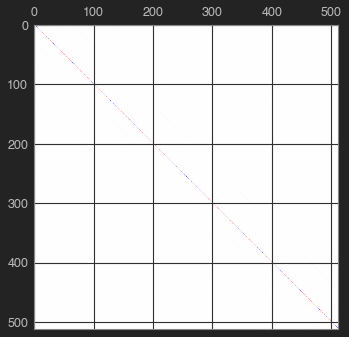

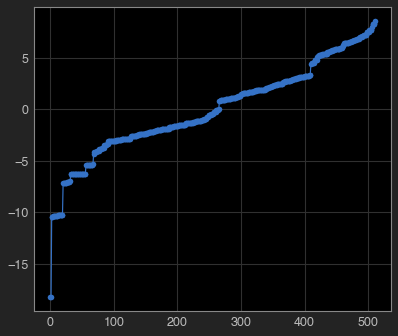

In [3]:
plot_hamiltonian_matrix(h.matrix); plt.show()
plt.plot(eigs, marker='o'); plt.show()

## time evolution

In [38]:
one_hot = sparse.eye(h.dim).getcol(1)
one_hot_dense = one_hot.toarray()
v = sparse.linalg.expm_multiply(-1j * h.matrix, one_hot)
v_dense = v.toarray()
#v = 

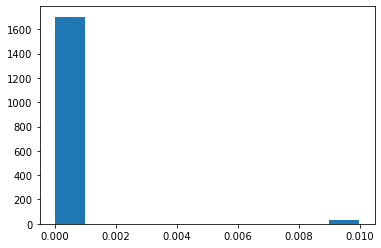

In [148]:
plt.hist(np.abs(v_dense[(np.abs(v_dense) > 1e-6) & (np.abs(v_dense) < 0.8)]));# plt.yscale('log')

In [10]:
import scipy.linalg as lin
if h.dim < 1000:
    U = lin.expm(-0.1j * h.matrix.toarray())
    v_dense = np.dot(U, one_hot_dense)
else:
    print("H too big!")

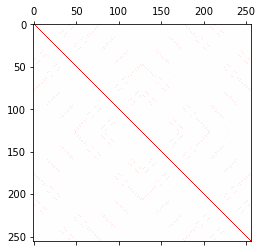

In [11]:
plot_bwr(np.abs(U))

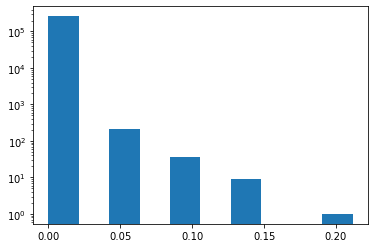

In [20]:
plt.hist(np.abs(v_dense)); plt.yscale('log')

Plotting 32 of 256 components above threshold


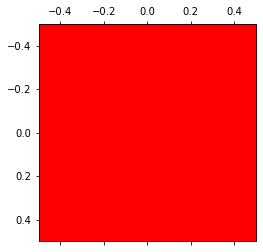

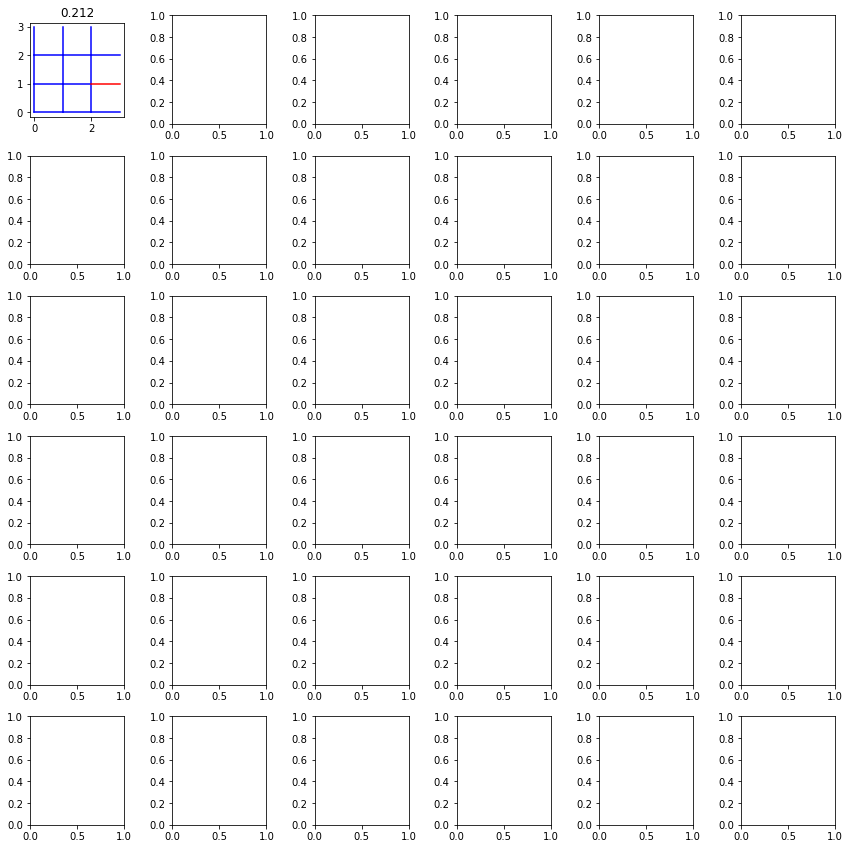

In [21]:
plot_vec(np.abs(v_dense).reshape(-1), h.qubits, threshold=0.15);plt.tight_layout(); plt.show()

In [29]:
eigs[0]

-14.000000000000005

In [55]:
np.count_nonzero(~np.isclose(vec, 0))

32

## ground + excited states

In [97]:
grid_point_class = h.local_terms[0].GridPointClass
B = Plaquette.new(grid_point_class.new(0,0)).generate_matrix(h.qubits).tocsc()
v0 = np.zeros(h.dim)
v0[0] = 1
vec = B.dot(v0)

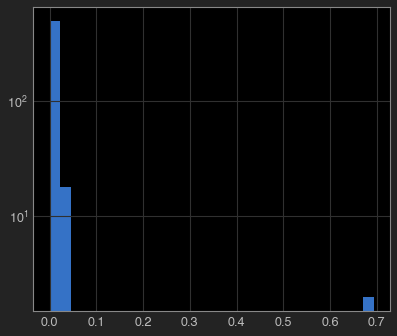

Plotting 36 of 92 components above threshold


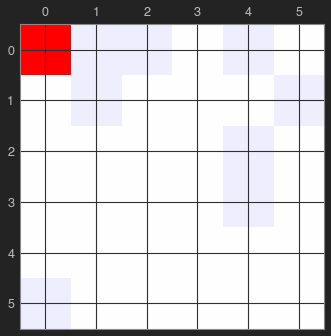

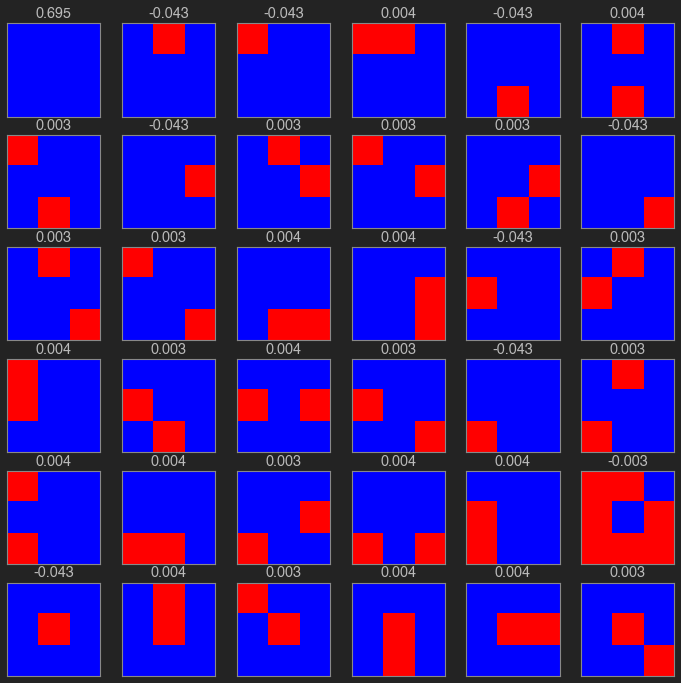

In [4]:
#vec = vecs[:,1]
for v in (vecs[:,0],):
    plt.hist(np.abs(v), bins=30); plt.yscale('log'); plt.show()
    plot_vec(v, h.qubits, threshold=0.001, max_terms=36); plt.show()


In [34]:
import numpy as np
from matplotlib import pyplot as plt

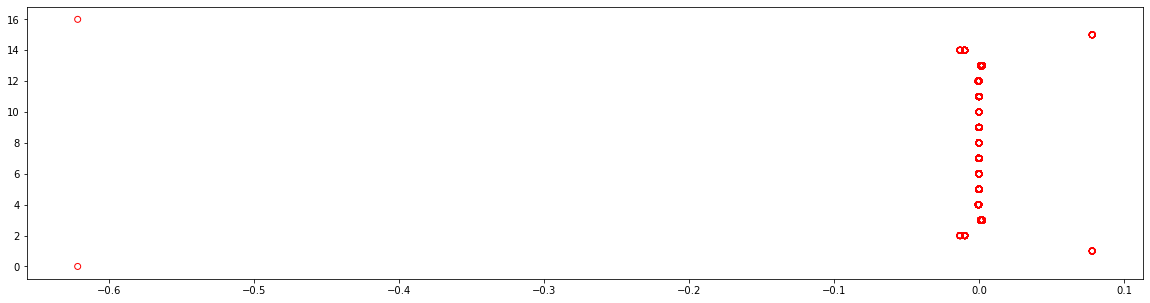

In [18]:
#up_bits = np.array([sum(int_to_bit_list(h.shape[0],i)) for i in range(h.shape[0])])
up_bits = np.array([i.bit_count() for i in range(h.shape[0])])
plt.figure(figsize=(20,5))
plt.scatter(vecs[:,0], up_bits, facecolors='none', edgecolors='r')

In [52]:
np.unique(np.round(vecs[:,0][up_bits == 3],5))

array([-0.00354, -0.00245, -0.00179, -0.00134])